In [90]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_squared_error
warnings.filterwarnings
pd.options.display.max_rows = 9999

In [43]:
file_path = 'C:/Users/OFFICE/Music_recomded_system_using_AI/reviews.csv'
ratings = pd.read_csv(file_path)

In [44]:
ratings

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN
...,...,...,...,...,...
61589,2022-01-01 03:01:29,Even though it was communicated that lyrics fe...,1,6,NaN
61590,2022-01-01 02:13:40,"Use to be sooo good back when I had it, and wh...",1,0,NaN
61591,2022-01-01 01:02:29,This app would be good if not for it taking ov...,2,10,NaN
61592,2022-01-01 00:49:23,The app is good hard to navigate and won't jus...,2,1,NaN


In [58]:
print(ratings.isnull().sum())


Time_submitted    0
Review            0
Rating            0
Total_thumbsup    0
Reply             0
user_id           0
song_id           0
dtype: int64


In [59]:
ratings = ratings.dropna()

In [62]:
ratings['Rating'] = pd.to_numeric(ratings['Rating'], errors='coerce')

In [63]:
print(ratings.isnull().sum())

Time_submitted    0
Review            0
Rating            0
Total_thumbsup    0
Reply             0
user_id           0
song_id           0
dtype: int64


In [64]:
ratings = ratings.dropna()

In [65]:
ratings['user_id'] = ratings.index
ratings['song_id'] = ratings.index

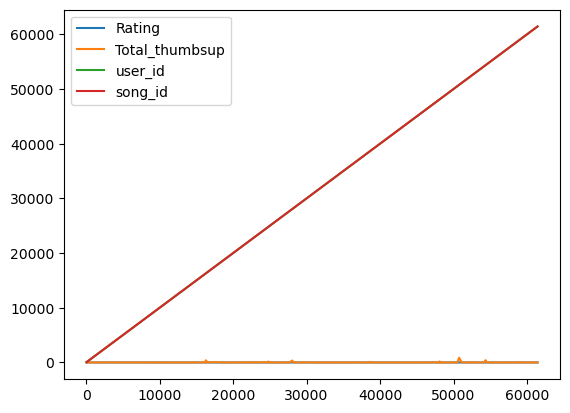

In [66]:
ratings.plot()
plt.show()

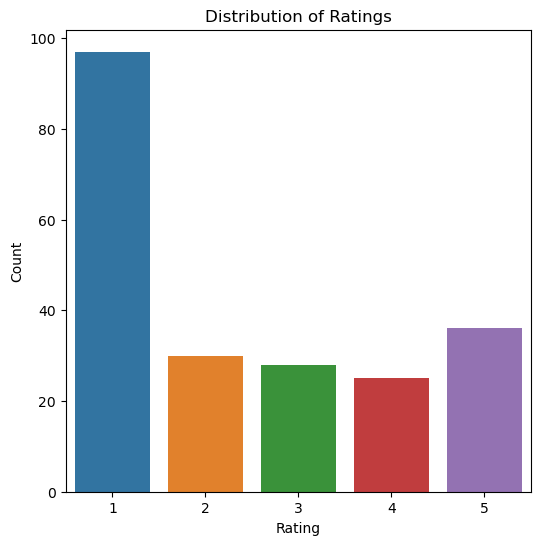

In [79]:
# Visualize the distribution of ratings
plt.figure(figsize=(6, 6))
sns.countplot(x='Rating', data=ratings)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

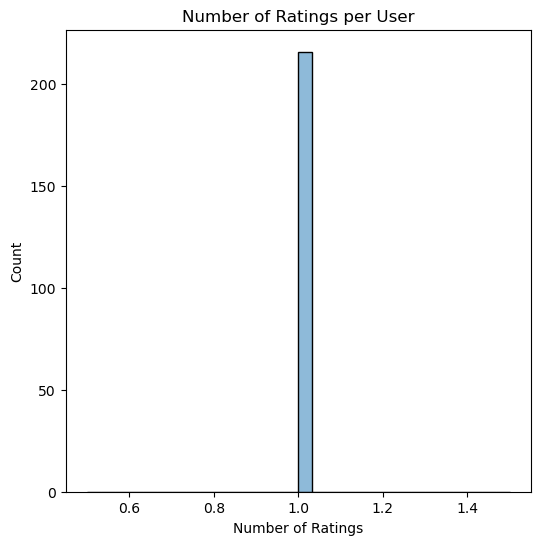

In [83]:
ratings_per_user = ratings.groupby('user_id').size()
plt.figure(figsize=(6, 6))
sns.histplot(ratings_per_user, bins=30, kde=True)
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Count')
plt.show()

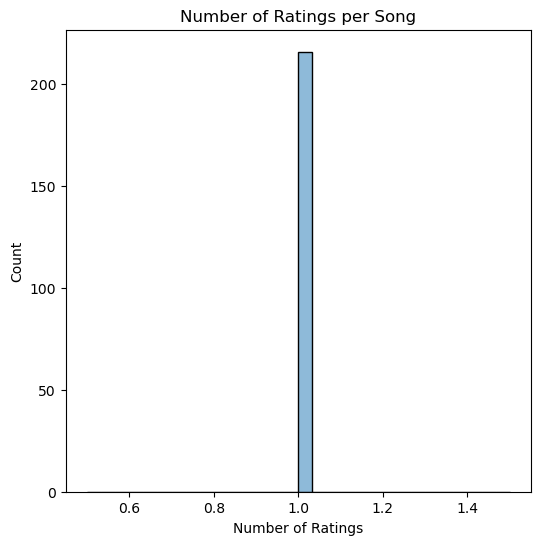

In [82]:
ratings_per_song = ratings.groupby('song_id').size()
plt.figure(figsize=(6, 6))
sns.histplot(ratings_per_song, bins=30, kde=True)
plt.title('Number of Ratings per Song')
plt.xlabel('Number of Ratings')
plt.ylabel('Count')
plt.show()

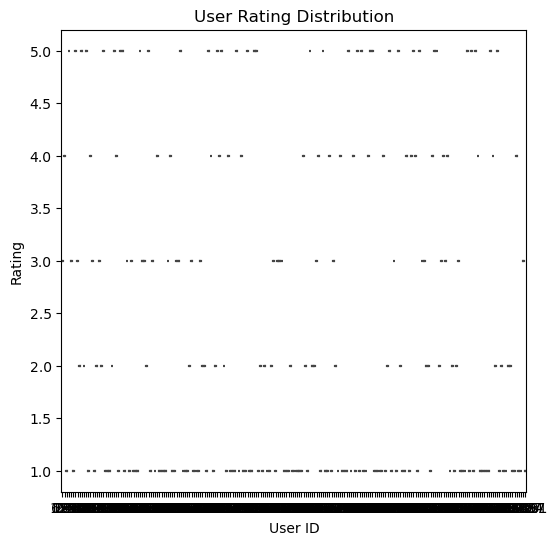

In [88]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='user_id', y='Rating', data=ratings)
plt.title('User Rating Distribution')
plt.xlabel('User ID')
plt.ylabel('Rating')
plt.xticks(rotation=0)
plt.show()

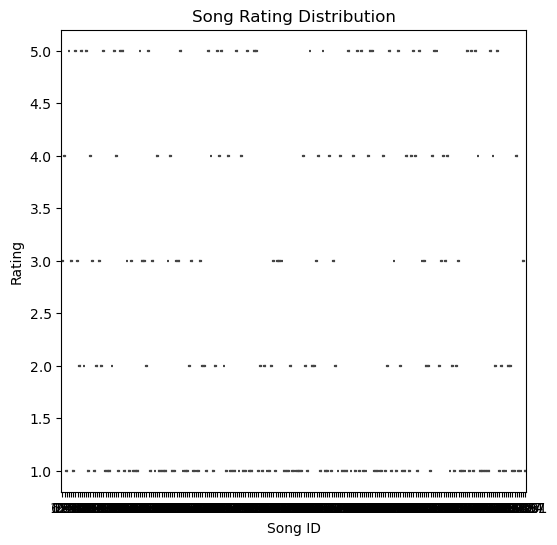

In [87]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='song_id', y='Rating', data=ratings)
plt.title('Song Rating Distribution')
plt.xlabel('Song ID')
plt.ylabel('Rating')
plt.xticks(rotation=0)
plt.show()

In [67]:
ratings.head()

,Time_submitted,Review,Rating,Total_thumbsup,Reply,user_id,song_id
73,2022-07-09 09:50:47,"Great song selection, amazing audio quality. H...",3,8,"Hey, thanks for the feedback! We'd love to hel...",73,73
699,2022-07-08 01:51:27,Seems like the random stopping of music has be...,4,4,"Hey, thanks for the report. If you haven't tri...",699,699
1151,2022-07-07 03:39:14,They would add their songs to MY PLAYLIST! I c...,1,1,"Hey, thanks for the feedback! You can always a...",1151,1151
1277,2022-07-06 20:16:03,I paid last month for Premium Family & my wife...,5,0,Hi James! We’re sorry to hear that. We’d love ...,1277,1277
1668,2022-07-06 00:59:54,I really don't care about the random pauses in...,3,0,"Hi again. If you haven't tried Premium yet, we...",1668,1668


In [68]:
mean = ratings.mean()

In [48]:
mean

Rating                3.155989
Total_thumbsup        7.649381
user_id           30796.500000
song_id           30796.500000
dtype: float64

In [49]:
ratings.fillna(mean, inplace=True)

In [50]:
ratings.head()

,Time_submitted,Review,Rating,Total_thumbsup,Reply,user_id,song_id
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN,0,0
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN,1,1
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN,2,2
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN,3,3
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN,4,4


In [69]:
try:
    user_item_matrix = ratings.pivot_table(index='user_id', columns='song_id', values='Rating')
    user_item_matrix.fillna(0, inplace=True)
    user_item_matrix_np = user_item_matrix.values
    print("User-item matrix created successfully.")
except Exception as e:
    print(f"Error creating user-item matrix: {e}")


User-item matrix created successfully.


In [70]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(ratings, test_size=0.2, random_state=42)

In [71]:
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(user_item_matrix_np)

NearestNeighbors(algorithm='brute', metric='cosine')

In [72]:
class SimpleCollaborativeFiltering:
    def __init__(self, user_item_matrix):
        self.user_item_matrix = user_item_matrix

    def fit(self):
        pass

    def predict(self, user_id, song_id):
        user_ratings = self.user_item_matrix.loc[user_id]
        song_ratings = self.user_item_matrix[song_id]
        user_mean_rating = user_ratings[user_ratings > 0].mean()
        song_mean_rating = song_ratings[song_ratings > 0].mean()
        return (user_mean_rating + song_mean_rating) / 2

simple_cf = SimpleCollaborativeFiltering(user_item_matrix)
simple_cf.fit()


In [73]:
def evaluate_model(model, test_data, model_type='knn'):
    if model_type == 'knn':
        predictions = []
        for _, row in test_data.iterrows():
            user_id = row['user_id']
            song_id = row['song_id']
            user_index = user_item_matrix.index.get_loc(user_id)
            distances, indices = model.kneighbors(user_item_matrix_np[user_index, :].reshape(1, -1), n_neighbors=6)
            neighbor_ratings = user_item_matrix_np[indices.flatten()]
            avg_ratings = neighbor_ratings.mean(axis=0)
            sorted_indices = np.argsort(avg_ratings)[::-1]
            predicted_rating = avg_ratings[song_id] if song_id in sorted_indices else np.mean(avg_ratings)
            predictions.append(predicted_rating)
    elif model_type == 'simple_cf':
        predictions = [model.predict(row['user_id'], row['song_id']) for _, row in test_data.iterrows()]
    
    true_ratings = test_data['Rating'].values
    mse = mean_squared_error(true_ratings, predictions)
    return mse

In [74]:
knn_mse = evaluate_model(knn, test_data, model_type='knn')
print(f"k-NN MSE: {knn_mse}")

k-NN MSE: 8.43345372881767


In [75]:
simple_cf_mse = evaluate_model(simple_cf, test_data, model_type='simple_cf')
print(f"Simple CF MSE: {simple_cf_mse}")

Simple CF MSE: 0.0


In [76]:
def get_top_n_recommendations(user_id, n=10, model=None, model_type='knn'):
    if model_type == 'knn':
        user_index = user_item_matrix.index.get_loc(user_id)
        distances, indices = model.kneighbors(user_item_matrix_np[user_index, :].reshape(1, -1), n_neighbors=n+1)
        neighbor_ratings = user_item_matrix_np[indices.flatten()]
        avg_ratings = neighbor_ratings.mean(axis=0)
        sorted_indices = np.argsort(avg_ratings)[::-1]
        top_n_recommendations = [(user_item_matrix.columns[i], avg_ratings[i]) for i in sorted_indices[:n]]
    elif model_type == 'simple_cf':
        all_songs = user_item_matrix.columns
        predictions = [model.predict(user_id, song_id) for song_id in all_songs]
        top_n_indices = np.argsort(predictions)[-n:][::-1]
        top_n_recommendations = [(all_songs[i], predictions[i]) for i in top_n_indices]
    
    return top_n_recommendations